In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score


In [2]:
def normalize(df):
    
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


def ml_model(X,y):
    
    X=normalize(X)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
    models = {}
    models.update({'LogR': LogisticRegression(solver='saga',penalty='l1',max_iter=1000)})
    
    for i in models:
        model=models[i].fit(x_train,y_train)
        y_pred = model.predict(x_test)
        results = confusion_matrix(y_test, y_pred)
        
        print(i)
        print('===================================')
        print(results)
        print('Accuracy Score :',accuracy_score(y_test, y_pred) )
        print('Report : ')
        print(classification_report(y_test, y_pred))
        
       
    return True

In [3]:
file=r'C:\Users\toshiba\Desktop\fire forest\data1\feature_selection.csv'
df_boruta=pd.read_csv(file)
#print(df_boruta.columns)
df_boruta['Fire_Severity'] = df_boruta['Fire_Severity'].astype('category',copy=False)

y=df_boruta['Fire_Severity']
df_boruta=df_boruta.drop('Fire_Severity',axis=1)

In [ ]:
###########################Feature engineering finishes here###########################
###PCA#####    
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_boruta.values)
print(pca_result)

plt.plot(range(3), pca.explained_variance_ratio_)
plt.plot(range(3), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

df_pca=pd.DataFrame(pca_result,columns=['Comp1','Comp2','Comp3'])
model=ml_model(df_pca,y)

In [ ]:
####FCA#####
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
ica_result=ICA.fit_transform(df_boruta.values)
print(ica_result)

plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(ica_result[:,0], ica_result[:,1])
plt.scatter(ica_result[:,1], ica_result[:,2])
plt.scatter(ica_result[:,2], ica_result[:,0])
df_ica=pd.DataFrame(ica_result,columns=['Comp1','Comp2','Comp3'])
model=ml_model(df_ica,y)

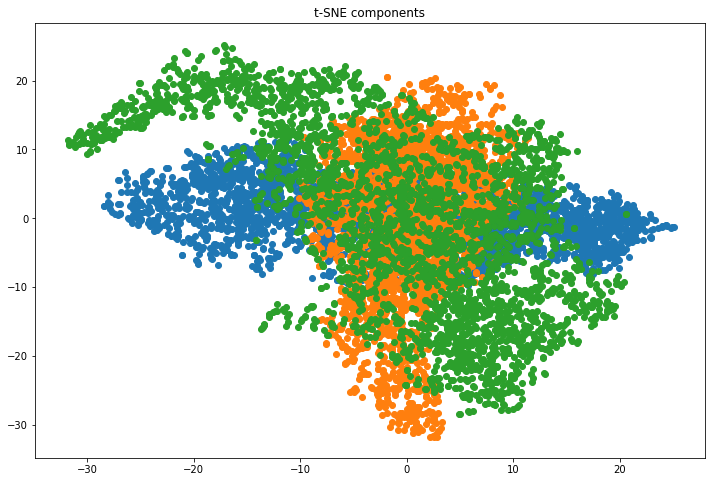

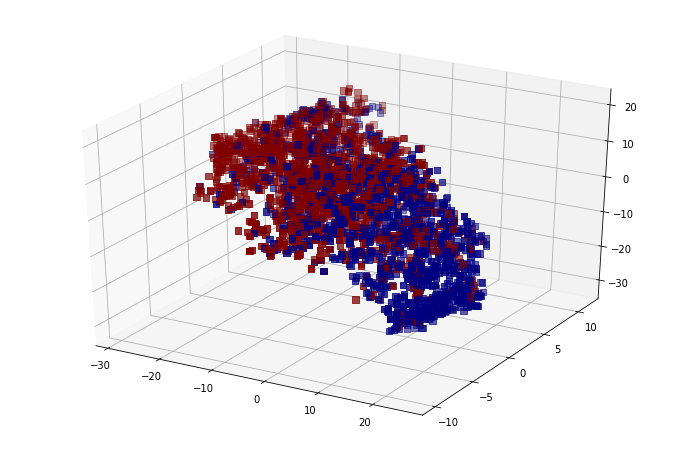

LogR
[[  0  65  53]
 [  0 156  83]
 [  0  56 237]]
Accuracy Score : 0.6046153846153847
Report : 
              precision    recall  f1-score   support

       Large       0.00      0.00      0.00       118
      Severe       0.56      0.65      0.60       239
       Small       0.64      0.81      0.71       293

    accuracy                           0.60       650
   macro avg       0.40      0.49      0.44       650
weighted avg       0.49      0.60      0.54       650



C:\Users\toshiba\Anaconda3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
########TSNE#########
from sklearn.manifold import TSNE
mylist=[]
for j in y.values.tolist():
    if j =='Small':
        mylist.append(0)
    
    else:
        mylist.append(1)
label1=np.array(mylist)

tsne = TSNE(n_components=3, n_iter=1000,n_iter_without_progress=5,perplexity=30.0,random_state=123).fit_transform(df_boruta.values)


plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(tsne[:,0], tsne[:,1])
plt.scatter(tsne[:,1], tsne[:,2])
plt.scatter(tsne[:,2], tsne[:,0])

#print(matplotlib."__version__")
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(tsne[:,0])
y1 = np.array(tsne[:,1])
z1 = np.array(tsne[:,2])

ax.scatter(x1,y1,z1, marker="s", c=label1 , s=40, cmap="jet")
plt.show()

df_tsne=pd.DataFrame(tsne,columns=['Comp1','Comp2','Comp3'])
model=ml_model(df_tsne,y)
    

In [ ]:
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=100, 
                             n_components=3, 
                             n_jobs=-1).fit_transform(df_boruta.values)
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])
df_isomap=pd.DataFrame(trans_data,columns=['Comp1','Comp2','Comp3'])
print(df_isomap.shape)
model=ml_model(df_isomap,y)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(trans_data[:,0])
y1 = np.array(trans_data[:,1])
z1 = np.array(trans_data[:,2])

ax.scatter(x1,y1,z1, marker="s", c=label1 , s=40, cmap="jet")
plt.show()


In [ ]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df_boruta.values)

plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])
df_factanalysis=pd.DataFrame(FA,columns=['Comp1','Comp2','Comp3'])
print(df_factanalysis.shape)
model=ml_model(df_factanalysis,y)

In [ ]:
import umap
umap_data = umap.UMAP(n_neighbors=100, min_dist=0.3, 
                      n_components=3).fit_transform(df_boruta.values)
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP')
plt.scatter(umap_data[:,0], umap_data[:,1])
plt.scatter(umap_data[:,1], umap_data[:,2])
plt.scatter(umap_data[:,2], umap_data[:,0])
df_umap=pd.DataFrame(umap_data,columns=['Comp1','Comp2','Comp1'])
print(df_umap.shape)
model=ml_model(df_umap,y)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(umap_data[:,0])
y1 = np.array(umap_data[:,1])
z1 = np.array(umap_data[:,2])

ax.scatter(x1,y1,z1, marker="s", c=label1 , s=40, cmap="jet")
plt.show()

##############################Dimesion reduction Finishes here###########################



(3248, 3) (3248,)


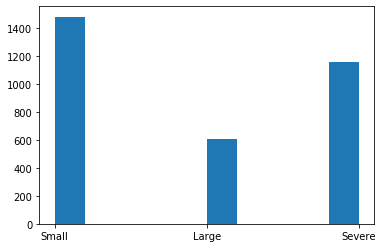

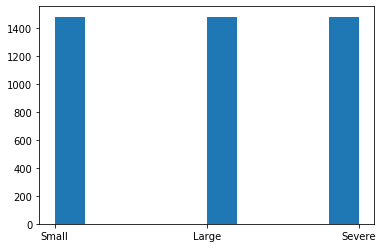

In [5]:
##########################Model Building starts ffrom here###############################
print(df_tsne.shape,y.shape)
plt.hist(y)
plt.show()

sm = SMOTE(random_state=123)
X_smote,y_smote = sm.fit_sample(df_tsne, y)

plt.hist(y_smote)
plt.show()

df_tsne_smote=pd.DataFrame(X_smote,columns=['Comp1','Comp2','Comp3'])
x_train, x_test, y_train, y_test = train_test_split(df_tsne_smote, y_smote, test_size=0.20, random_state=123)

In [42]:

models = {}
#models.update({'LogR': LogisticRegression(penalty='l2',C=1.0,solver='newton-cg')})
#models.update({'Bag_CL': BaggingClassifier()})
#models.update({'RandomForest': RandomForestClassifier(n_estimators=733,min_samples_split=2,min_samples_leaf=1,max_depth=100,max_features='auto',bootstrap=True)})
#models.update({'ExtraTClf': ExtraTreesClassifier()})
#models.update({'KNN': KNeighborsClassifier(metric='euclidean', n_neighbors= 5, weights= 'distance')})
#models.update({'DT': DecisionTreeClassifier(max_leaf_nodes=99, min_samples_split=13, random_state=42)})
#models.update({'SVM': SVC(C= 1, gamma= 1, kernel='rbf')})
models.update({'XG':XGBClassifier()})
#models.update({'ABC':AdaBoostClassifier()})
models.update({'GBC':GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)})



def scaling_func(x_train,x_test):
    if i in ['LogR','KNN','SVM']:
        scaler = MinMaxScaler()
        scaler.fit(x_train)
        x_train_transformed=scaler.transform(x_train)

        scaler.fit(x_test)
        x_test_transformed=scaler.transform(x_test)
    else:
        x_train_transformed=x_train
        x_test_transformed=x_test
    return x_train_transformed,x_test_transformed



##from sklearn.model_selection import GridSearchCV
for i in models:
    
    x_train_transformed,x_test_transformed=scaling_func(x_train,x_test)
    
    mdl=models[i]
    mdl.fit(x_train_transformed,y_train)
    
    y_pred = mdl.predict(x_test_transformed)
    results = confusion_matrix(y_test, y_pred)
    print(i)
    print('===================================')
    print(results)
    print('Accuracy Score :',accuracy_score(y_test, y_pred) )
    print('Report : ')
    print(classification_report(y_test, y_pred))

    

XG
[[182  73  60]
 [ 63 183  53]
 [ 73  47 156]]
Accuracy Score : 0.5853932584269663
Report : 
              precision    recall  f1-score   support

       Large       0.57      0.58      0.58       315
      Severe       0.60      0.61      0.61       299
       Small       0.58      0.57      0.57       276

    accuracy                           0.59       890
   macro avg       0.59      0.59      0.59       890
weighted avg       0.59      0.59      0.59       890

GBC
[[156  98  61]
 [ 83 162  54]
 [ 95  33 148]]
Accuracy Score : 0.5235955056179775
Report : 
              precision    recall  f1-score   support

       Large       0.47      0.50      0.48       315
      Severe       0.55      0.54      0.55       299
       Small       0.56      0.54      0.55       276

    accuracy                           0.52       890
   macro avg       0.53      0.52      0.53       890
weighted avg       0.53      0.52      0.52       890



In [ ]:
y_ordinal1=pd.Series(y_smote)
y_ordinal1.shape

kf = KFold(n_splits=3,shuffle=False)
kf.split(df_tsne)  
accuracy_model = []
for train_index, test_index in kf.split(df_tsne):
    # Split train-test
    #print(train_index,test_index)
    
    
    x_train_cv, x_test_cv = df_tsne.iloc[train_index], df_tsne.iloc[test_index]
    scaler.fit(x_train_cv)
    x_train_transformed=scaler.transform(x_train_cv)
    #print(x_train.shape,x_test.shape)
    
    y_train_cv, y_test_cv = y_ordinal1.iloc[train_index], y_ordinal1.iloc[test_index]
    #print(y_train_cv)
    
    
        
    svc = SVC(kernel='rbf',degree=20)
    md = svc.fit(x_train_transformed, y_train_cv)
    
    scaler.fit(x_test_cv)
    x_test_transformed=scaler.transform(x_test_cv)
    
    y_pred= md.predict(x_test_transformed)
    #print(accuracy_score(y_test_cv, y_pred))
    accuracy_model.append(accuracy_score(y_test_cv, y_pred))
    
    
avg = sum(accuracy_model)/len(accuracy_model)
print("The average is ", round(avg,2))


In [ ]:

print(df_tsne.shape,y.shape)
sm = SMOTE(random_state=123)
X_smote,y_smote = sm.fit_sample(df_tsne, y)
print(X_smote.shape,y_smote.shape)

from sklearn.model_selection import GridSearchCV
C = np.logspace(0, 5, num=20)
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

logistic = LogisticRegression()
gridsearch = GridSearchCV(logistic, hyperparameters)
best_model = gridsearch.fit(X_smote, y_smote)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])

print(best_model.best_estimator_.get_params())

################################################################




In [ ]:

from sklearn.model_selection import GridSearchCV
grid_params={'n_neighbors':[3,5,7,11,15,19],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
gs=GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1)
gs_results=gs.fit(X_smote,y_smote)

gs_results.best_score_
gs_results.best_params_


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2,20))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_smote, y_smote)

print(grid_search_cv.best_params_)

Fitting 3 folds for each of 1764 candidates, totalling 5292 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_leaf_nodes': 99, 'min_samples_split': 13}


[Parallel(n_jobs=1)]: Done 5292 out of 5292 | elapsed:  1.7min finished


In [7]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(grid)
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf = GridSearchCV(estimator = rf, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf.fit(X_smote, y_smote)
print(rf_random.best_params_)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [20]:
from sklearn.model_selection import GridSearchCV 
model = SVC() 
print(model)
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_smote, y_smote) 
print(grid.best_params_)


SVC()
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.464, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.475, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.431, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.477, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.487, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.530, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.528, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.526, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.595, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.515, total=   1.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.506, total=   1.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.515, total=   1.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.592, total=   1.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.569, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.511, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.513, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.577, total=   4.5s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.544, total=   5.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.518, total=   1.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.507, total=   1.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.480, total=   1.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.571, total=   1.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.537, total=   1.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.0min finished


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [29]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid)
clf.fit(X_smote, y_smote)
print(clf.best_params_)

{'base_estimator__max_depth': 5, 'max_samples': 0.5}
